<a href="https://colab.research.google.com/github/wladimirLefebure/bigdata-wl/blob/master/gravitational_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment for Week 3
# **PRA3024: Analysis of Big Data in Physics.**

The Fisher Matrix formalism: Plug and Play version 

SyntaxError: ignored

In [3]:
from sympy import symbols, diff, Symbol
import scipy.integrate as integrate
import numpy as np
import math
          
#general comments

#M_1 = mass of first object (black hole)           
#M_2 = mass of second object (balck hole)
#M = M_1 + M_2 (total mass)

# f = frequency      
# t_c= time of collision    
#phi_c = phase 


c=3*10**8
G=6.67430*10**(-11)   
SNR=10
fs=20 #lower bond
M=10**(31)
#fu=((6**(3/2)*np.pi*M))**(-1)*(c**3)*(1/G)
#Virgo
fu_virgo=500 #higher bond
f=Symbol('f')
S0_virgo=3.24*10**(-46)
def S_virgo(f):
  return S0_virgo*((6.23*f)**(-5)+2*f**(-1)+1+f**(2))

#ture for f>fs
A =np.sqrt(SNR/(4* (integrate.quad(lambda f: (f**(-7/6)/(S0_virgo*((4.49*f)**-56 + (0.16*f)**-4.52 + 0.52 + 0.32*f*f))),fs,fu_virgo)[0])))
print (A)

#for the initial ligo noise curve
def S_ligo(f):
  return S0_ligo*((4.49*f)**(-56)+(0.16*f)**-4.52 + 0.52 + 0.32*f*f)
fu_ligo = 150 
fs_ligo = 40
S0_ligo = 9*10**(-46)



6.092935262837662e-22


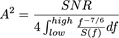

In [0]:
pi =math.pi 

m2 ,m1,T_C,phy_C= symbols ('m2,m1,T_C,phy_c')

M = m2 +m1


def Psi(f):
 return 2*f*T_c - phy_C - (pi/4 ) + (3/(128*(m1.m2/m**(2))*((pi*M*f)**(3/5))))


 
def h(f,psi): 
 return A*f**(-7/6)*exp(1j*psi)


 

In [0]:
Parametre = m1,m2,T_C,phy_C
#the partial derivative of h(f)
def h_partial(f, params, x, dx):   
  dparams = params.copy()
  dparams[x] += dx
  dy = h(f, dparams, PN)-h(f, params, PN)
  return dy/dx

#generating the Fischer matrix
def generate_matrix(params, dx):
  
# create an n*n matrix where n is the number of observables
  n = len(params)
  matrix = np.empty([n,n]) 
  
# matrix
  for i in range (n):
    for j in range (n):
      
      #start integration
      accumulator = 0
      for k in range(int(fs/dx), int(f0/dx)):
        part_i = h_partial(k*dx, params,i, 0.001)
        part_j = np.conj(h_partial(k*dx, params,j, 0.001))
        accumulator += np.real(part_i * part_j / S(k*dx))
      
      #once integration is done add it to the matrix
      matrix[i][j] = accumulator*4
  
  return matrix


#Extract the diagonal elements from the inverted Fischer matrix

def extract_from_matrix(matrix):
  #invert matrix
  y = np.linalg.inv(matrix) 
  z = []
  
  #square root of diagonal elements
  for i in range (len(y)):
    z.append(m.sqrt(y[i][i]))
   
  return z
derivative_hf_i = diff(h,Paramer[i]) 
def tau(h,f,p1,p2):
  return 4* (integrate.quad(lambda f:diff( h(f,psi),Parametre[p1])*diff(h(f,psi),Parametre[p2])/S_virgo(f)),fs,fu_virgo)[0]))
Fisher_M = (Parametre, list (reversed(Parametre)))
